In [664]:
import pandas as pd
from re import search
from math import sqrt, radians
from sklearn.neighbors import DistanceMetric
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [665]:
google_data=pd.read_json('/Users/santiagoborgnino/Documents/Github/Smart-Tour/Datasets/google_bcn_poi_data.json')
poi_dataset=pd.read_excel('/Users/santiagoborgnino/Documents/Github/Smart-Tour/Datasets/POI_barcelona.xlsx', sheet_name='POI base')

#### Formatting

In [666]:
#Google Maps Scraping Dataset
google_data.rename(columns={'title':'name'}, inplace=True)
google_data['name']=google_data['name'].str.upper()
google_data.columns = google_data.columns.str.strip()
google_data['name']=google_data['name'].str.strip()
google_data=google_data.drop(['subTitle', 'address', 'locatedIn', 'plusCode', 'url','placeId','website', 'phone','searchString', 'scrapedAt', 'popularTimesLiveText','popularTimesLivePercent' , 'reviewsDistribution', 'reviews','imageUrls'], axis=1)
google_data.drop(['temporarilyClosed', 'permanentlyClosed'], axis=1)
google_data.drop_duplicates(subset=['name'], inplace=True)
google_data.set_index('name', inplace=True)

#Obervatorium de Barcelona Data Set
poi_dataset=poi_dataset.drop(['google maps link', 'google maps link complete' ], axis=1)
poi_dataset.drop('name', axis=1, inplace=True)
poi_dataset=poi_dataset.rename(columns={'name (upercase)':'name', 'tipo1':'category', 'longitud2':'longitud', 'latitud2':'latitud'})
poi_dataset.drop('part name', axis=1, inplace=True)
poi_dataset.drop_duplicates(subset=['name'], inplace=True)
poi_dataset.set_index('name', inplace=True)

In [667]:
google_data=google_data[google_data['permanentlyClosed']==False]

In [668]:
model_data=google_data.join(poi_dataset, how='left')

In [669]:
#Drop POIs that don't have visiting data
model_data=model_data.dropna(subset=[1], axis=0)

In [670]:
model_data.shape

(116, 32)

In [671]:
years=[1994, 2000, 2011, 2014, 2015, 2016, 2017, 2018, 2019]
months=[1,2,3,4,5,6,7,8,9,10,11,12]
model_data=model_data.drop(years, axis=1)


In [672]:
model_data.columns

Index([         'categoryName',     'temporarilyClosed',
           'permanentlyClosed',            'totalScore',
                    'location', 'popularTimesHistogram',
                'reviewsCount',               'latitud',
                    'longitud',                  'tipo',
                     'Average',                       1,
                             2,                       3,
                             4,                       5,
                             6,                       7,
                             8,                       9,
                            10,                      11,
                            12],
      dtype='object')

In [673]:
#Assign park guell data to sagrada familia

In [674]:
model_data=model_data.append(model_data.loc['PARK GÜELL'].copy())

In [675]:
model_data=model_data.reset_index()

In [676]:
model_data.name.value_counts()

PARK GÜELL                                    2
MUSEU D'AUTÒMATS                              1
MMACA - MUSEU DE MATEMÀTIQUES DE CATALUNYA    1
PARC DEL LABERINT D'HORTA                     1
CAN SERRA MUSEU DE MATARÓ                     1
                                             ..
CAIXAFORUM BARCELONA                          1
MUSEU FREDERIC MARÈS                          1
FC BARCELONA MUSEUM                           1
MUSEU CAN TINTURÉ                             1
PARC D'OLÈRDOLA                               1
Name: name, Length: 116, dtype: int64

In [677]:
model_data=model_data.drop(['Average', 'location','temporarilyClosed', 'permanentlyClosed'], axis=1)

In [678]:
model_data.iloc[len(model_data)-1,0]='LA SAGRADA FAMILIA2'

In [679]:
model_data.head()

,name,categoryName,totalScore,popularTimesHistogram,reviewsCount,latitud,longitud,tipo,1,2,3,4,5,6,7,8,9,10,11,12
0,MONTJUÏC CASTLE,Castle,4.4,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",36979,41.364433,2.167106,Museums and Collections,37473.901759,43391.508523,52225.124478,71440.552584,80648.358602,90169.512164,105267.277054,105277.041020,86043.943424,69172.296055,43791.287896,39817.196440
1,COSMOCAIXA BARCELONA,Museum,4.6,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",23944,41.413270,2.130658,Museums and Collections,44432.163152,51448.568087,61922.435150,84705.838973,95623.376781,106912.445403,124813.606514,124825.183481,102020.829245,82016.406076,51922.579639,47210.567500
2,MUSEU NACIONAL D'ART DE CATALUNYA,Art museum,4.6,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",18928,41.368855,2.153363,Museums and Collections,39308.963568,45516.349983,54782.539824,74938.929415,84597.633054,94585.028573,110422.116844,110432.358943,90257.434603,72559.598491,45935.706177,41767.007191
3,CENTRE DE CULTURA CONTEMPORÀNIA DE BARCELONA,Cultural center,4.5,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",7432,41.383884,2.166795,Exposition Centers,20682.337228,23948.341912,28823.730264,39428.976726,44510.885475,49765.734838,58098.389037,58103.777897,47488.779412,38177.096237,24168.985385,21975.632256
4,PARC DEL LABERINT D'HORTA,City park,4.4,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",12500,41.437927,2.147543,Leisure Spaces,11073.227368,12821.831118,15432.091416,21110.091154,23830.921514,26644.343475,31105.607863,31108.493034,25425.272108,20439.840150,12939.962610,11765.651524


In [680]:
model_data=model_data.set_index('name')

In [681]:
model_data

,categoryName,totalScore,popularTimesHistogram,reviewsCount,latitud,longitud,tipo,1,2,3,4,5,6,7,8,9,10,11,12
name,,,,,,,,,,,,,,,,,,,
MONTJUÏC CASTLE,Castle,4.4,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",36979,41.364433,2.167106,Museums and Collections,37473.901759,43391.508523,52225.124478,71440.552584,80648.358602,90169.512164,105267.277054,105277.041020,86043.943424,69172.296055,43791.287896,39817.196440
COSMOCAIXA BARCELONA,Museum,4.6,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",23944,41.413270,2.130658,Museums and Collections,44432.163152,51448.568087,61922.435150,84705.838973,95623.376781,106912.445403,124813.606514,124825.183481,102020.829245,82016.406076,51922.579639,47210.567500
MUSEU NACIONAL D'ART DE CATALUNYA,Art museum,4.6,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",18928,41.368855,2.153363,Museums and Collections,39308.963568,45516.349983,54782.539824,74938.929415,84597.633054,94585.028573,110422.116844,110432.358943,90257.434603,72559.598491,45935.706177,41767.007191
CENTRE DE CULTURA CONTEMPORÀNIA DE BARCELONA,Cultural center,4.5,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",7432,41.383884,2.166795,Exposition Centers,20682.337228,23948.341912,28823.730264,39428.976726,44510.885475,49765.734838,58098.389037,58103.777897,47488.779412,38177.096237,24168.985385,21975.632256
PARC DEL LABERINT D'HORTA,City park,4.4,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",12500,41.437927,2.147543,Leisure Spaces,11073.227368,12821.831118,15432.091416,21110.091154,23830.921514,26644.343475,31105.607863,31108.493034,25425.272108,20439.840150,12939.962610,11765.651524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PANTÀ DE FOIX,Park,4.4,"{'Su': [{'hour': 4, 'occupancyPercent': 0}, {'...",5016,41.260393,1.644078,Natural spaces,241.535616,279.677169,336.613671,460.465473,519.813793,581.181774,678.493443,678.556377,554.590687,445.845572,282.253921,256.639171
PARC DE LA SERRALADA LITORAL,Park,4.5,"{'Su': [{'hour': 4, 'occupancyPercent': 0}, {'...",159,41.530429,2.340604,Natural spaces,73.337647,84.918596,102.206270,139.811489,157.831466,176.464674,206.011491,206.030600,168.390801,135.372437,85.700977,77.923551
MUSEU DE CIÈNCIES NATURALS DE BARCELONA,Natural history museum,4.4,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",4687,41.410780,2.220482,Museums and Collections,10946.211774,12674.758143,15255.077417,20867.947588,23557.568628,26338.719198,30748.810596,30751.662672,25133.631203,20205.384706,12791.534606,11630.693470


In [682]:
columns=['popularTimesHistogram']+months
model_data.loc['LA SAGRADA FAMILIA2',['categoryName', 'totalScore', 'reviewsCount', 'latitud', 'longitud', 'tipo']]=model_data.loc['LA SAGRADA FAMILIA',['categoryName', 'totalScore', 'reviewsCount', 'latitud', 'longitud', 'tipo']]
model_data.drop('LA SAGRADA FAMILIA', axis=0, inplace=True)

In [683]:
model_data=model_data.reset_index()

In [684]:
model_data.loc[len(model_data)-1,'name']='LA SAGRADA FAMILIA'

In [685]:
model_data.name.value_counts()

MUSEU D'AUTÒMATS                               1
MUSEU DE SANT CUGAT - CLAUSTRE DEL MONESTIR    1
MUSEU DEL DISSENY DE BARCELONA                 1
GÜELL PALACE                                   1
PARC DEL LABERINT D'HORTA                      1
                                              ..
CAIXAFORUM BARCELONA                           1
MUSEU FREDERIC MARÈS                           1
FC BARCELONA MUSEUM                            1
MUSEU CAN TINTURÉ                              1
PARC D'OLÈRDOLA                                1
Name: name, Length: 116, dtype: int64

In [686]:
model_data['totalScore'].value_counts().to_frame().reset_index().sort_values('index', ascending=False)

,index,totalScore
7,4.8,3
8,4.7,3
3,4.6,14
1,4.5,24
0,4.4,24
2,4.3,18
4,4.2,12
5,4.1,7
9,4.0,3
10,3.9,2


<AxesSubplot:>

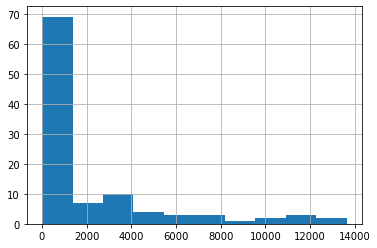

In [687]:
model_data[model_data['reviewsCount']<15000]['reviewsCount'].hist()

In [688]:
model_data=model_data[~model_data['popularTimesHistogram'].isnull()]

In [689]:
model_data.head()

,name,categoryName,totalScore,popularTimesHistogram,reviewsCount,latitud,longitud,tipo,1,2,3,4,5,6,7,8,9,10,11,12
0,MONTJUÏC CASTLE,Castle,4.4,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",36979,41.364433,2.167106,Museums and Collections,37473.901759,43391.508523,52225.124478,71440.552584,80648.358602,90169.512164,105267.277054,105277.041020,86043.943424,69172.296055,43791.287896,39817.196440
1,COSMOCAIXA BARCELONA,Museum,4.6,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",23944,41.413270,2.130658,Museums and Collections,44432.163152,51448.568087,61922.435150,84705.838973,95623.376781,106912.445403,124813.606514,124825.183481,102020.829245,82016.406076,51922.579639,47210.567500
2,MUSEU NACIONAL D'ART DE CATALUNYA,Art museum,4.6,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",18928,41.368855,2.153363,Museums and Collections,39308.963568,45516.349983,54782.539824,74938.929415,84597.633054,94585.028573,110422.116844,110432.358943,90257.434603,72559.598491,45935.706177,41767.007191
3,CENTRE DE CULTURA CONTEMPORÀNIA DE BARCELONA,Cultural center,4.5,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",7432,41.383884,2.166795,Exposition Centers,20682.337228,23948.341912,28823.730264,39428.976726,44510.885475,49765.734838,58098.389037,58103.777897,47488.779412,38177.096237,24168.985385,21975.632256
4,PARC DEL LABERINT D'HORTA,City park,4.4,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",12500,41.437927,2.147543,Leisure Spaces,11073.227368,12821.831118,15432.091416,21110.091154,23830.921514,26644.343475,31105.607863,31108.493034,25425.272108,20439.840150,12939.962610,11765.651524


In [690]:
model_data_content=model_data.copy()

In [691]:
model_data_content.drop(months, axis=1, inplace=True)
model_data_content.drop(['latitud', 'longitud', 'popularTimesHistogram'], axis=1, inplace=True)
model_data_content.reset_index(inplace=True, drop=True)

In [692]:
model_data_content

,name,categoryName,totalScore,reviewsCount,tipo
0,MONTJUÏC CASTLE,Castle,4.4,36979,Museums and Collections
1,COSMOCAIXA BARCELONA,Museum,4.6,23944,Museums and Collections
2,MUSEU NACIONAL D'ART DE CATALUNYA,Art museum,4.6,18928,Museums and Collections
3,CENTRE DE CULTURA CONTEMPORÀNIA DE BARCELONA,Cultural center,4.5,7432,Exposition Centers
4,PARC DEL LABERINT D'HORTA,City park,4.4,12500,Leisure Spaces
...,...,...,...,...,...
71,PANTÀ DE FOIX,Park,4.4,5016,Natural spaces
72,PARC DE LA SERRALADA LITORAL,Park,4.5,159,Natural spaces
73,MUSEU DE CIÈNCIES NATURALS DE BARCELONA,Natural history museum,4.4,4687,Museums and Collections
74,CERCS MINE MUSEUM,Museum,4.5,359,Museums and Collections


In [693]:
score_bins=[0, 4.3, 4.6, 5]
score_labels=['SLOW', 'SMEDIUM', 'SHIGH']
model_data_content['score_cat']=pd.cut(model_data_content['totalScore'], score_bins, include_lowest=True,labels=labels)

In [694]:
model_data_content['score_cat'].value_counts()

SMEDIUM    49
SLOW       23
SHIGH       4
Name: score_cat, dtype: int64

In [695]:
review_bins=[0, 1000, 15000, 60000, 200000]
review_labels=['RSLOW', 'RMEDIUM', 'RHIGH', 'RVERY_HIGH']
model_data_content['reviews_cat']=pd.cut(model_data_content['reviewsCount'], review_bins, include_lowest=True,labels=review_labels)

In [696]:
model_data_content['reviews_cat'].value_counts()

RMEDIUM       37
RSLOW         30
RHIGH          6
RVERY_HIGH     3
Name: reviews_cat, dtype: int64

In [697]:
model_data_content.drop(['totalScore', 'reviewsCount'], axis=1, inplace=True)

In [698]:
model_data_content=pd.concat([model_data_content, pd.get_dummies(model_data_content['score_cat'])], axis=1)
model_data_content=pd.concat([model_data_content, pd.get_dummies(model_data_content['reviews_cat'])], axis=1)
model_data_content=pd.concat([model_data_content, pd.get_dummies(model_data_content['tipo'])], axis=1)
model_data_content=pd.concat([model_data_content, pd.get_dummies(model_data_content['categoryName'])], axis=1)

In [699]:
model_data_content.drop(['categoryName', 'tipo', 'score_cat', 'reviews_cat'], axis=1, inplace=True)


In [700]:
model_data_content

,name,SLOW,SMEDIUM,SHIGH,RSLOW,RMEDIUM,RHIGH,RVERY_HIGH,Areas of architectural interest,Cableway,...,Museum,National park,Natural history museum,Nature preserve,Palace,Park,Rail museum,Tourist information center,Transportation service,Zoo
0,MONTJUÏC CASTLE,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,COSMOCAIXA BARCELONA,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,MUSEU NACIONAL D'ART DE CATALUNYA,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CENTRE DE CULTURA CONTEMPORÀNIA DE BARCELONA,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PARC DEL LABERINT D'HORTA,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,PANTÀ DE FOIX,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
72,PARC DE LA SERRALADA LITORAL,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
73,MUSEU DE CIÈNCIES NATURALS DE BARCELONA,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
74,CERCS MINE MUSEUM,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Distance Matrix

In [701]:
import haversine as hs
from haversine import Unit

In [702]:
distance_matrix=model_data.copy()
distance_matrix['name'].value_counts()

MUSEU DE LA TÈCNICA DE MANRESA    1
MUSEU ERÒTIC DE BARCELONA         1
PALAU ROBERT                      1
MARITIME MUSEUM                   1
PARC DEL GARRAF                   1
                                 ..
PARC DE LA SERRALADA DE MARINA    1
ARXIU FOTOGRÀFIC DE BARCELONA     1
PANTÀ DE FOIX                     1
ARGENTONA WATER JUG MUSEUM        1
MONTSENY                          1
Name: name, Length: 76, dtype: int64

In [703]:
#Dropping unncessary columns
distance_matrix=distance_matrix.drop(months, axis=1)
distance_matrix=distance_matrix.drop(['categoryName', 'totalScore', 'popularTimesHistogram', 'reviewsCount', 'tipo'], axis=1)

In [704]:
#Creating coordinates columns with long and lat
distance_matrix['coor']=list(zip(distance_matrix.longitud, distance_matrix.latitud))

In [705]:
#Function that calcualtes distance in km between two geolocations
def distance_from(loc1,loc2): 
    dist=hs.haversine(loc1,loc2, unit=Unit.MILES)
    return round(dist,4)

In [706]:
#Create a matrix that calculates distances between each point of interest
for _,row in distance_matrix.iterrows():
    distance_matrix[row['name']]=distance_matrix['coor'].apply(lambda x: distance_from(row.coor,x))

In [707]:
distance_matrix

,name,latitud,longitud,coor,MONTJUÏC CASTLE,COSMOCAIXA BARCELONA,MUSEU NACIONAL D'ART DE CATALUNYA,CENTRE DE CULTURA CONTEMPORÀNIA DE BARCELONA,PARC DEL LABERINT D'HORTA,TELEFÈRIC DE MONTJUÏC (BARCELONA CABLE CAR),...,PARC DE LA SERRALADA DE MARINA,SERRA DE COLLSEROLA NATURAL PARK,PARC DE MONTESQUIU,PARC DEL GARRAF,ESPAI NATURAL DE LES GUILLERIES-SAVASSONA,PANTÀ DE FOIX,PARC DE LA SERRALADA LITORAL,MUSEU DE CIÈNCIES NATURALS DE BARCELONA,CERCS MINE MUSEUM,LA SAGRADA FAMILIA
0,MONTJUÏC CASTLE,41.364433,2.167106,"(2.167106, 41.364433)",0.0000,4.2085,0.9974,1.3431,5.2513,0.4135,...,8.0727,7.6555,51.8777,17.9762,43.2141,36.8451,16.5844,4.8827,60.7546,2.7814
1,COSMOCAIXA BARCELONA,41.413270,2.130658,"(2.1306581, 41.41327)",4.2085,0.0000,3.4446,3.2172,2.0638,3.7977,...,7.6147,4.0793,48.7396,17.0935,41.0834,35.2381,16.6087,6.2086,56.7167,3.1287
2,MUSEU NACIONAL D'ART DE CATALUNYA,41.368855,2.153363,"(2.1533628, 41.368855)",0.9974,3.4446,0.0000,1.3921,4.7860,0.6682,...,8.3690,6.6886,51.6393,17.1773,43.2703,35.9765,17.0823,5.4667,60.1350,2.8456
3,CENTRE DE CULTURA CONTEMPORÀNIA DE BARCELONA,41.383884,2.166795,"(2.1667948, 41.383884)",1.3431,3.2172,1.3921,0.0000,3.9614,1.0721,...,6.9798,7.0365,50.5386,18.4154,41.9656,37.1094,15.7029,4.1483,59.4945,1.4956
4,PARC DEL LABERINT D'HORTA,41.437927,2.147543,"(2.1475434, 41.437927)",5.2513,2.0638,4.7860,3.9614,0.0000,4.8900,...,5.8789,5.3238,46.9233,18.9961,39.0468,36.8833,14.7892,5.3768,55.5352,3.0161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,PANTÀ DE FOIX,41.260393,1.644078,"(1.6440776250015798, 41.2603934067999)",36.8451,35.2381,35.9765,37.1094,36.8833,36.6298,...,42.7600,31.6092,70.8461,19.1101,69.9673,0.0000,51.6114,41.1574,65.5281,37.9970
112,PARC DE LA SERRALADA LITORAL,41.530429,2.340604,"(2.34060377200831, 41.5304291274776)",16.5844,16.6087,17.0823,15.7029,14.7892,16.5837,...,9.0013,20.0058,41.2850,33.6952,29.2078,51.6114,0.0000,11.7098,56.4498,14.3954
113,MUSEU DE CIÈNCIES NATURALS DE BARCELONA,41.410780,2.220482,"(2.220482, 41.41078)",4.8827,6.2086,5.4667,4.1483,5.3768,4.9141,...,3.7071,10.2716,48.5865,22.5527,39.0001,41.1574,11.7098,0.0000,59.2628,3.1798
114,CERCS MINE MUSEUM,42.186040,1.852492,"(1.85249173489762, 42.1860400318951)",60.7546,56.7167,60.1350,59.4945,55.5352,60.3713,...,56.2309,54.9210,25.3414,62.4615,40.2032,65.5281,56.4498,59.2628,0.0000,58.4202


In [708]:
#Dropping remaining unncessary columns
distance_matrix=distance_matrix.drop(['latitud', 'longitud', 'coor'], axis=1)
distance_matrix=distance_matrix.set_index('name')

In [709]:
distance_matrix

,MONTJUÏC CASTLE,COSMOCAIXA BARCELONA,MUSEU NACIONAL D'ART DE CATALUNYA,CENTRE DE CULTURA CONTEMPORÀNIA DE BARCELONA,PARC DEL LABERINT D'HORTA,TELEFÈRIC DE MONTJUÏC (BARCELONA CABLE CAR),RECINTE MODERNISTA DE SANT PAU,EL BORN CENTRE DE CULTURA I MEMÒRIA,MUSEU FREDERIC MARÈS,PICASSO MUSEUM,...,PARC DE LA SERRALADA DE MARINA,SERRA DE COLLSEROLA NATURAL PARK,PARC DE MONTESQUIU,PARC DEL GARRAF,ESPAI NATURAL DE LES GUILLERIES-SAVASSONA,PANTÀ DE FOIX,PARC DE LA SERRALADA LITORAL,MUSEU DE CIÈNCIES NATURALS DE BARCELONA,CERCS MINE MUSEUM,LA SAGRADA FAMILIA
name,,,,,,,,,,,,,,,,,,,,,
MONTJUÏC CASTLE,0.0000,4.2085,0.9974,1.3431,5.2513,0.4135,3.3641,1.8542,1.5211,1.7163,...,8.0727,7.6555,51.8777,17.9762,43.2141,36.8451,16.5844,4.8827,60.7546,2.7814
COSMOCAIXA BARCELONA,4.2085,0.0000,3.4446,3.2172,2.0638,3.7977,3.1156,4.1234,3.7645,3.9735,...,7.6147,4.0793,48.7396,17.0935,41.0834,35.2381,16.6087,6.2086,56.7167,3.1287
MUSEU NACIONAL D'ART DE CATALUNYA,0.9974,3.4446,0.0000,1.3921,4.7860,0.6682,3.3799,2.3873,1.9345,2.2065,...,8.3690,6.6886,51.6393,17.1773,43.2703,35.9765,17.0823,5.4667,60.1350,2.8456
CENTRE DE CULTURA CONTEMPORÀNIA DE BARCELONA,1.3431,3.2172,1.3921,0.0000,3.9614,1.0721,2.0626,1.1653,0.6896,0.9740,...,6.9798,7.0365,50.5386,18.4154,41.9656,37.1094,15.7029,4.1483,59.4945,1.4956
PARC DEL LABERINT D'HORTA,5.2513,2.0638,4.7860,3.9614,0.0000,4.8900,2.6280,4.3848,4.2219,4.3092,...,5.8789,5.3238,46.9233,18.9961,39.0468,36.8833,14.7892,5.3768,55.5352,3.0161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PANTÀ DE FOIX,36.8451,35.2381,35.9765,37.1094,36.8833,36.6298,38.2045,38.2655,37.7859,38.0738,...,42.7600,31.6092,70.8461,19.1101,69.9673,0.0000,51.6114,41.1574,65.5281,37.9970
PARC DE LA SERRALADA LITORAL,16.5844,16.6087,17.0823,15.7029,14.7892,16.5837,14.0061,14.7528,15.1664,14.9151,...,9.0013,20.0058,41.2850,33.6952,29.2078,51.6114,0.0000,11.7098,56.4498,14.3954
MUSEU DE CIÈNCIES NATURALS DE BARCELONA,4.8827,6.2086,5.4667,4.1483,5.3768,4.9141,3.0932,3.0850,3.5330,3.2612,...,3.7071,10.2716,48.5865,22.5527,39.0001,41.1574,11.7098,0.0000,59.2628,3.1798


#### User profile

In [723]:
model_data_content[(model_data_content['name']=='LA SAGRADA FAMILIA') | (model_data_content['name']=='PARK GÜELL')].set_index('name')

,name,SLOW,SMEDIUM,SHIGH,RSLOW,RMEDIUM,RHIGH,RVERY_HIGH,Areas of architectural interest,Cableway,...,Museum,National park,Natural history museum,Nature preserve,Palace,Park,Rail museum,Tourist information center,Transportation service,Zoo
61,PARK GÜELL,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
75,LA SAGRADA FAMILIA,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [724]:
df_user=model_data_content[(model_data_content['name']=='LA SAGRADA FAMILIA') | (model_data_content['name']=='PARK GÜELL')].set_index('name')
df_user

,SLOW,SMEDIUM,SHIGH,RSLOW,RMEDIUM,RHIGH,RVERY_HIGH,Areas of architectural interest,Cableway,Exposition Centers,...,Museum,National park,Natural history museum,Nature preserve,Palace,Park,Rail museum,Tourist information center,Transportation service,Zoo
name,,,,,,,,,,,,,,,,,,,,,
PARK GÜELL,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
LA SAGRADA FAMILIA,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [725]:
userProfile=df_user.transpose().sum(axis=1)
userProfile.to_frame().transpose()
userProfile

SLOW                               0
SMEDIUM                            1
SHIGH                              1
RSLOW                              0
RMEDIUM                            0
RHIGH                              0
RVERY_HIGH                         2
Areas of architectural interest    2
Cableway                           0
Exposition Centers                 0
Leisure Spaces                     0
Museums and Collections            0
Natural spaces                     0
Archaeological museum              0
Art museum                         0
Basilica                           1
Castle                             0
City park                          0
Cultural center                    0
Ethnographic museum                0
Exhibition and trade centre        0
Heritage museum                    0
Hiking area                        0
Historical landmark                0
History museum                     0
Local history museum               0
Maritime museum                    0
M

In [726]:
model_data_content2=model_data_content.set_index('name')

In [727]:
recommendationTable = ((model_data_content2*userProfile).sum(axis=1))/(userProfile.sum())

In [728]:
#### Recommendation Output

In [729]:
recommendationTable=recommendationTable.sort_values(ascending=False).head(5).to_frame()
recommendationTable.reset_index(inplace=True)
recommendationTable.columns=['name', 'dotProduct']
recommendationTable

,name,dotProduct
0,LA SAGRADA FAMILIA,0.750
1,PARK GÜELL,0.750
2,CASA BATLLÓ,0.625
3,RECINTE MODERNISTA DE SANT PAU,0.375
4,GÜELL PALACE,0.375


In [730]:
pip install dijkstra

Note: you may need to restart the kernel to use updated packages.


In [731]:
recommended_itinerary=[]
for i in recommendationTable['name'].head(5):
    recommended_itinerary.append(i)

In [732]:
recommended_itinerary

['LA SAGRADA FAMILIA',
 'PARK GÜELL',
 'CASA BATLLÓ',
 'RECINTE MODERNISTA DE SANT PAU',
 'GÜELL PALACE']

In [747]:
graph={recommended_itinerary[0]:{recommended_itinerary[1]:6, recommended_itinerary[2]:2}, 
      recommended_itinerary[1]:{recommended_itinerary[0]:6,recommended_itinerary[2]:2, recommended_itinerary[3]:1, recommended_itinerary[4]:2},
       recommended_itinerary[2]:{recommended_itinerary[0]:2,recommended_itinerary[1]:2, recommended_itinerary[3]:2,recommended_itinerary[4]:3},
      recommended_itinerary[3]:{recommended_itinerary[1]:1, recommended_itinerary[2]:2,recommended_itinerary[4]:3},
       recommended_itinerary[4]:{recommended_itinerary[2]:3,recommended_itinerary[1]:2,recommended_itinerary[3]:3}}
       

In [746]:
def dijkstra(graph,src,dest,visited=[],distances={},predecessors={}):
    """ calculates a shortest path tree routed in src
    """    
    # a few sanity checks
    if src not in graph:
        raise TypeError('The root of the shortest path tree cannot be found')
    if dest not in graph:
        raise TypeError('The target of the shortest path cannot be found')    
    # ending condition
    if src == dest:
        # We build the shortest path and display it
        path=[]
        pred=dest
        while pred != None:
            path.append(pred)
            pred=predecessors.get(pred,None)
        # reverses the array, to display the path nicely
        readable=path[0]
        for index in range(1,len(path)): readable = path[index]+'--->'+readable
        #prints it 
        print('shortest path - array: '+str(path))
        print("path: "+readable+",   cost="+str(distances[dest]))     
    else:     
        # if it is the initial  run, initializes the cost
        if not visited: 
            distances[src]=0
        # visit the neighbors
        for neighbor in graph[src] :
            if neighbor not in visited:
                new_distance = distances[src] + graph[src][neighbor]
                if new_distance < distances.get(neighbor,float('inf')):
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = src
        # mark as visited
        visited.append(src)
        # now that all neighbors have been visited: recurse                         
        # select the non visited node with lowest distance 'x'
        # run Dijskstra with src='x'
        unvisited={}
        for k in graph:
            if k not in visited:
                unvisited[k] = distances.get(k,float('inf'))        
        x=min(unvisited, key=unvisited.get)
        dijkstra(graph,x,dest,visited,distances,predecessors)
        


if __name__ == "__main__":
    #import sys;sys.argv = ['', 'Test.testName']
    #unittest.main()
    
    dijkstra(graph,recommended_itinerary[0], recommended_itinerary[4])

shortest path - array: ['GÜELL PALACE', 'CASA BATLLÓ', 'LA SAGRADA FAMILIA']
path: LA SAGRADA FAMILIA--->CASA BATLLÓ--->GÜELL PALACE,   cost=5


In [753]:
model_data[model_data['name'].str.contains('REC')]

,name,categoryName,totalScore,popularTimesHistogram,reviewsCount,latitud,longitud,tipo,1,2,3,4,5,6,7,8,9,10,11,12
6,RECINTE MODERNISTA DE SANT PAU,Museum,4.7,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'...",6319,41.412384,2.175742,Areas of architectural interest,13456.534283,15581.492575,18753.563013,25653.646936,28960.085591,32379.044475,37800.513319,37804.019469,30897.590594,24839.136828,15725.04968,14297.989902


In [767]:
google_data.loc['RECINTE MODERNISTA DE SANT PAU', 'popularTimesHistogram']['Sa']

[{'hour': 6, 'occupancyPercent': 0},
 {'hour': 7, 'occupancyPercent': 0},
 {'hour': 8, 'occupancyPercent': 0},
 {'hour': 9, 'occupancyPercent': 0},
 {'hour': 10, 'occupancyPercent': 29},
 {'hour': 11, 'occupancyPercent': 65},
 {'hour': 12, 'occupancyPercent': 86},
 {'hour': 13, 'occupancyPercent': 71},
 {'hour': 14, 'occupancyPercent': 44},
 {'hour': 15, 'occupancyPercent': 31},
 {'hour': 16, 'occupancyPercent': 28},
 {'hour': 17, 'occupancyPercent': 0},
 {'hour': 18, 'occupancyPercent': 0},
 {'hour': 19, 'occupancyPercent': 0},
 {'hour': 20, 'occupancyPercent': 0},
 {'hour': 21, 'occupancyPercent': 0},
 {'hour': 22, 'occupancyPercent': 0},
 {'hour': 23, 'occupancyPercent': 0}]